In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tflearn
from sklearn import svm

## 读取数据集

In [2]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [12]:
x_train = mnist.train.images
y_train = mnist.train.labels

x_test = mnist.test.images
y_test = mnist.test.labels

In [13]:
print('训练集信息：')
print(mnist.train.images.shape,mnist.train.labels.shape)
print('测试集信息：')
print(mnist.test.images.shape,mnist.test.labels.shape)
print('验证集信息：')
print(mnist.validation.images.shape,mnist.validation.labels.shape)

训练集信息：
((55000, 784), (55000, 10))
测试集信息：
((10000, 784), (10000, 10))
验证集信息：
((5000, 784), (5000, 10))


### Softmax训练

In [17]:
# 构建图
# sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [18]:
#softmax回归模型
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_ = tf.placeholder("float", [None,10])
#计算交叉熵
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
#设置TensorFlow用梯度下降算法以0.01的学习速率最小化交叉熵
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
#初始化变量
init = tf.initialize_all_variables()
#评估模型
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()  ##保存的API

In [19]:
#循环训练模型
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        batch = mnist.train.next_batch(200)
        sess.run(train_step,feed_dict={x: batch[0], y_: batch[1]})
        
#         sess.run(train_step,feed_dict={x: x_train, y_: y_train})
    #输出结果
    print "softmax回归测试MNIST数据集正确率:"
    print sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    
    save_path = saver.save(sess,"./Test_MNIST_CROSS_ENTROPY.ckpt")  #保存模型
    print("save model:{0} Finished".format(save_path))

softmax回归测试MNIST数据集正确率:
0.098
save model:./Test_MNIST_CROSS_ENTROPY.ckpt Finished


### 加载模型进行预测

In [ ]:
pred_class_index=tf.argmax(y, 1)
with tf.Session() as sess:
    #sess.run(init) #不使用训练好的参数
    load_path = saver.restore(sess,"./Test_MNIST_CROSS_ENTROPY.ckpt")  #load上一步训练的参数
    batch_x=mnist.test.images[:256]
    batch_y=mnist.test.labels[:256]
    
    pred_value = sess.run([pred_class_index], feed_dict={x: batch_x})
    # Calculate accuracy for 256 mnist test images
    # mnist部分测试数据集，用刚刚训练好的模型来做预测。
    print("Testing Accuracy:", np.sum(pred_value ==  np.argmax(batch_y, 1)) / float(batch_y.shape[0]))

INFO:tensorflow:Restoring parameters from ./Test_MNIST_CROSS_ENTROPY.ckpt
('Testing Accuracy:', 0.07421875)


### SVM训练

In [ ]:
sc = svm.SVC(gamma=0.025)
sc.fit(x_train, np.argmax(y_train, axis=1))

In [ ]:
pred = sc.predict(batch_x)
# print pred
# print np.argmax(batch_y, axis=1)
print np.sum(pred == np.argmax(batch_y, axis=1)) / float(batch_y.shape[0])

### 读取图像预测

In [12]:
img1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img2 = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img3 = cv2.imread('3.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img4 = cv2.imread('4.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img5 = cv2.imread('5.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img6 = cv2.imread('6.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img8 = cv2.imread('8.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img9 = cv2.imread('9.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img10 = cv2.imread('10.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img11 = cv2.imread('11.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img12 = cv2.imread('12.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img13 = cv2.imread('13.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img14 = cv2.imread('14.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0

/home/lian19931201/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


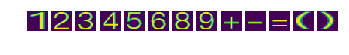

In [13]:
plt.subplot(1,14,1).imshow(img1.reshape(28, 28))
plt.subplot(1,14,2).imshow(img2.reshape(28, 28))
plt.subplot(1,14,3).imshow(img3.reshape(28, 28))
plt.subplot(1,14,4).imshow(img4.reshape(28, 28))
plt.subplot(1,14,5).imshow(img5.reshape(28, 28))
plt.subplot(1,14,6).imshow(img6.reshape(28, 28))
plt.subplot(1,14,7).imshow(img8.reshape(28, 28))
plt.subplot(1,14,8).imshow(img9.reshape(28, 28))
plt.subplot(1,14,9).imshow(img10.reshape(28, 28))
plt.subplot(1,14,10).imshow(img11.reshape(28, 28))
plt.subplot(1,14,11).imshow(img12.reshape(28, 28))
plt.subplot(1,14,12).imshow(img13.reshape(28, 28))
plt.subplot(1,14,13).imshow(img14.reshape(28, 28))

plt.subplot(1,14,1).axis('off')
plt.subplot(1,14,2).axis('off')
plt.subplot(1,14,3).axis('off')
plt.subplot(1,14,4).axis('off')
plt.subplot(1,14,5).axis('off')
plt.subplot(1,14,6).axis('off')
plt.subplot(1,14,7).axis('off')
plt.subplot(1,14,8).axis('off')
plt.subplot(1,14,9).axis('off')
plt.subplot(1,14,10).axis('off')
plt.subplot(1,14,11).axis('off')
plt.subplot(1,14,12).axis('off')
plt.subplot(1,14,13).axis('off')
plt.show()

In [14]:
# 使用mnist train，预测图像结果
imgs = np.vstack(
    [img1, img2, img3, img4, img5, img6, img8, img9, img10, img11, img12, img13, img14])
print imgs.shape
print sc.predict(imgs)

with tf.Session() as sess:
    #sess.run(init) #不使用训练好的参数
    load_path = saver.restore(sess,"./Test_MNIST_model.ckpt")  #load上一步训练的参数
    batch_x=mnist.test.images[:256]
    batch_y=mnist.test.labels[:256]
    
    pred_value = sess.run(pred_class_index, feed_dict={x: imgs})
    print pred_value

(13, 784)
[3 2 3 2 5 5 5 2 2 2 6 0 3]
INFO:tensorflow:Restoring parameters from ./Test_MNIST_model.ckpt
[0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
# 使用传入图像train
imgs_y = np.array([1,2,3,4,5,6,8,9,10,11,12,13,14])
sc = svm.SVC(gamma=0.025)
sc.fit(imgs, imgs_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
sc.predict(imgs)

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14])

In [18]:
sc = svm.SVC(gamma=0.025)
sc.fit(np.vstack([x_train, imgs]), np.hstack([np.argmax(y_train, axis=1), imgs_y]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
print sc.predict(batch_x[0].reshape(1, -1))
print sc.predict(batch_x[1].reshape(1, -1))
print sc.predict(batch_x[2].reshape(1, -1))
print sc.predict(batch_x[3].reshape(1, -1))

print sc.predict(imgs)

[7]
[2]
[1]
[0]
[3 2 3 4 5 6 8 9 2 2 6 0 3]


## 加载手写数字

In [20]:
img1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img2 = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img3 = cv2.imread('3.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img4 = cv2.imread('4.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img5 = cv2.imread('5.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img9 = cv2.imread('9.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img22 = cv2.imread('22.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img222 = cv2.imread('222.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img2222 = cv2.imread('2222.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img33 = cv2.imread('33.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0

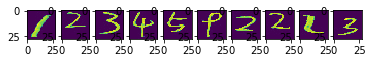

In [21]:
plt.subplot(1,10,1).imshow(img1.reshape(28, 28))
plt.subplot(1,10,2).imshow(img2.reshape(28, 28))
plt.subplot(1,10,3).imshow(img3.reshape(28, 28))
plt.subplot(1,10,4).imshow(img4.reshape(28, 28))
plt.subplot(1,10,5).imshow(img5.reshape(28, 28))
plt.subplot(1,10,6).imshow(img9.reshape(28, 28))
plt.subplot(1,10,7).imshow(img22.reshape(28, 28))
plt.subplot(1,10,8).imshow(img222.reshape(28, 28))
plt.subplot(1,10,9).imshow(img2222.reshape(28, 28))
plt.subplot(1,10,10).imshow(img33.reshape(28, 28))

plt.show()

In [29]:
imgs = np.vstack(
    [img1, img2, img3, img4, img5, img9, img22, img222, img2222, img33])
print 'SVM predict result:', sc.predict(imgs)

with tf.Session() as sess:
    #sess.run(init) #不使用训练好的参数
    load_path = saver.restore(sess,"./Test_MNIST_model.ckpt")  #load上一步训练的参数
    
    pred_value = sess.run([pred_class_index], feed_dict={x: imgs})
    print 'Softmax predict result:', pred_value
    # Calculate accuracy for 256 mnist test images
    # mnist部分测试数据集，用刚刚训练好的模型来做预测。
#     print("Testing Accuracy:", np.sum(pred_value ==  np.argmax(batch_y, 1)) / float(batch_y.shape[0]))

SVM predict result: [1 2 3 8 7 5 2 2 6 3]
INFO:tensorflow:Restoring parameters from ./Test_MNIST_model.ckpt
Softmax predict result: [array([5, 6, 3, 8, 7, 5, 2, 2, 5, 3])]


## CNN

In [30]:
def conv_net(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden):
    #第一个卷积层:padding=SAME,保证输出的feature map与输入矩阵的大小相同
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    #max_pooling,窗口大小为2x2
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],              # l1 shape=(?, 14, 14, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    #dropout:每个神经元有p_keep_conv的概率以1/p_keep_conv的比例进行归一化,有(1-p_keep_conv)的概率置为0
    l1 = tf.nn.dropout(l1, p_keep_conv)

    #第二个卷积层
    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                     # l2a shape=(?, 14, 14, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],              # l2 shape=(?, 7, 7, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    #第三个卷积层
    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3,                     # l3a shape=(?, 7, 7, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],              # l3 shape=(?, 4, 4, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    #将所有的feature map合并成一个2048维向量
    l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]])    # reshape to (?, 2048)
    l3 = tf.nn.dropout(l3, p_keep_conv)
    #后面两层为全连接层
    l4 = tf.nn.relu(tf.matmul(l3, w4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    pyx = tf.matmul(l4, w_o)
    
    return pyx

In [31]:
#初始化参数
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

In [32]:
batch_size = 128
test_size = 256

In [33]:
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trX = trX.reshape(-1, 28, 28, 1)  # 将每张图片用一个28x28的矩阵表示,(55000,28,28,1)
teX = teX.reshape(-1, 28, 28, 1)  # 将每张图片用一个28x28的矩阵表示,(1000,28,28,1)

In [34]:
X = tf.placeholder("float", [None, 28, 28, 1])
Y = tf.placeholder("float", [None, 10])

In [35]:
w = init_weights([3, 3, 1, 32])       # 第一层卷积核大小为3x3,输入一张图,输出32个feature map
w2 = init_weights([3, 3, 32, 64])     # 第二层卷积核大小为3x3,输入32个feature map,输出64个feature map
w3 = init_weights([3, 3, 64, 128])    # 第三层卷积核大小为3x3,输入64个feature map,输出128个feature map
w4 = init_weights([128 * 4 * 4, 625]) # FC 128 * 4 * 4 inputs, 625 outputs
w_o = init_weights([625, 10])         # FC 625 inputs, 10 outputs (labels)

In [36]:
p_keep_conv = tf.placeholder("float") # 卷积层的dropout概率
p_keep_hidden = tf.placeholder("float")# 全连接层的dropout概率
py_x = conv_net(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden)

In [37]:
#初始化变量
init = tf.initialize_all_variables()
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y))# 交叉熵目标函数
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)#RMSPro算法最小化目标函数

#评估模型
predict_op = tf.argmax(py_x, 1)#返回每个样本的预测结果
saver = tf.train.Saver()  ##保存的API

In [38]:
# Launch the graph in a session
print 'GPU USING:', tf.test.gpu_device_name()
import time
tmp_time = time.time()
with tf.Session() as sess:
    # you need to initialize all variables
    tf.initialize_all_variables().run()

    for i in range(3):
        training_batch = zip(range(0, len(trX), batch_size),
                             range(batch_size, len(trX)+1, batch_size))
        for start, end in training_batch:
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                          p_keep_conv: 0.8, p_keep_hidden: 0.5})
        #test
        test_indices = np.arange(len(teX)) 
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]

        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden: 1.0})))
        
    save_path = saver.save(sess,"./Test_MNIST_CNN.ckpt")
    print("save model:{0} Finished".format(save_path))
print 'time cost:', time.time() - tmp_time

GPU USING: 
(0, 0.953125)
(1, 0.9765625)
(2, 0.99609375)
save model:./Test_MNIST_CNN.ckpt Finished
time cost: 425.772927999


In [39]:
img1 = cv2.imread('1_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img2 = cv2.imread('2_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img3 = cv2.imread('3_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img4 = cv2.imread('4_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img5 = cv2.imread('5_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img6 = cv2.imread('6_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img7 = cv2.imread('7_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img8 = cv2.imread('8_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img9 = cv2.imread('9_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img0 = cv2.imread('0_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0

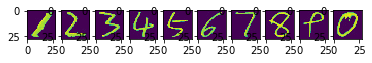

In [40]:
plt.subplot(1,10,1).imshow(img1.reshape(28, 28))
plt.subplot(1,10,2).imshow(img2.reshape(28, 28))
plt.subplot(1,10,3).imshow(img3.reshape(28, 28))
plt.subplot(1,10,4).imshow(img4.reshape(28, 28))
plt.subplot(1,10,5).imshow(img5.reshape(28, 28))
plt.subplot(1,10,6).imshow(img6.reshape(28, 28))
plt.subplot(1,10,7).imshow(img7.reshape(28, 28))
plt.subplot(1,10,8).imshow(img8.reshape(28, 28))
plt.subplot(1,10,9).imshow(img9.reshape(28, 28))
plt.subplot(1,10,10).imshow(img0.reshape(28, 28))

plt.show()

In [42]:
imgs = np.vstack(
    [img1, img2, img3, img4, img5, img6, img7, img8, img9, img0]).reshape(-1, 28, 28, 1)
imgs[imgs < 0.015] = 0
with tf.Session() as sess:
    #sess.run(init) #不使用训练好的参数
    load_path = saver.restore(sess,"./Test_MNIST_CNN.ckpt")  #load上一步训练的参数
    
    pred = sess.run(predict_op, feed_dict={X: imgs, p_keep_conv: 1.0, p_keep_hidden: 1.0})
    print("Testing Result:", pred)

INFO:tensorflow:Restoring parameters from ./Test_MNIST_CNN.ckpt
('Testing Result:', array([1, 2, 3, 4, 5, 6, 7, 8, 8, 0]))


## AlexNet

In [17]:
# 定义网络超参数
learning_rate = 0.001
training_iters = 20000
batch_size = 64
display_step = 20

In [18]:
# 定义网络参数
n_input = 784 # 输入的维度
n_classes = 10 # 标签的维度
dropout = 0.8 # Dropout 的概率

In [19]:
# 占位符输入
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

In [31]:
def conv2d(name, l_input, w, b):
    conv = tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1], padding='SAME')
    bias = tf.nn.bias_add(conv, b)
    relu = tf.nn.relu(bias, name=name)
    return relu

In [32]:
def max_pool(name, l_input, k):
    pool = tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME', name=name)
    return pool

In [37]:
def norm(name, l_input, lsize=4):
    lrn = tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)
    return lrn

In [38]:
def alex_net(_X, _weights, _biases, _dropout):
    # 向量转为矩阵
    _X = tf.reshape(_X, shape=[-1, 28, 28, 1])

    # 卷积层
    conv1 = conv2d('conv1', _X, _weights['wc1'], _biases['bc1'])
    # 下采样层
    pool1 = max_pool('pool1', conv1, k=2)
    # 归一化层
    norm1 = norm('norm1', pool1, lsize=4)
    # Dropout
    norm1 = tf.nn.dropout(norm1, _dropout)

    # 卷积
    conv2 = conv2d('conv2', norm1, _weights['wc2'], _biases['bc2'])
    # 下采样
    pool2 = max_pool('pool2', conv2, k=2)
    # 归一化
    norm2 = norm('norm2', pool2, lsize=4)
    # Dropout
    norm2 = tf.nn.dropout(norm2, _dropout)

    # 卷积
    conv3 = conv2d('conv3', norm2, _weights['wc3'], _biases['bc3'])
    # 下采样
    pool3 = max_pool('pool3', conv3, k=2)
    # 归一化
    norm3 = norm('norm3', pool3, lsize=4)
    # Dropout
    norm3 = tf.nn.dropout(norm3, _dropout)
    
    # 全连接层，先把特征图转为向量
    dense1 = tf.reshape(norm3, [-1, _weights['wd1'].get_shape().as_list()[0]]) 
    dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1') 
    # 全连接层
    dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2') # Relu activation

    # 网络输出层
    out = tf.matmul(dense2, _weights['out']) + _biases['out']
    return out

In [39]:
# 存储所有的网络参数
weights = {
    'wc1': tf.Variable(tf.random_normal([3, 3, 1, 64])),
    'wc2': tf.Variable(tf.random_normal([3, 3, 64, 128])),
    'wc3': tf.Variable(tf.random_normal([3, 3, 128, 256])),
    'wd1': tf.Variable(tf.random_normal([4*4*256, 1024])),
    'wd2': tf.Variable(tf.random_normal([1024, 1024])),
    'out': tf.Variable(tf.random_normal([1024, 10]))
}
biases = {
    'bc1': tf.Variable(tf.random_normal([64])),
    'bc2': tf.Variable(tf.random_normal([128])),
    'bc3': tf.Variable(tf.random_normal([256])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'bd2': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [40]:
# 构建模型
pred = alex_net(x, weights, biases, keep_prob)

# 定义损失函数和学习步骤
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [41]:
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [42]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [43]:
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 获取批数据
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % display_step == 0:
            # 计算精度
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            # 计算损失值
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss) + ", Training Accuracy = " + "{:.5f}".format(acc))
        step += 1
        
    save_path = saver.save(sess,"./Test_MNIST_AlexNet.ckpt")
    print("save model:{0} Finished".format(save_path))
    print ("Optimization Finished!")
    # 计算测试精度
    print ("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256], y: mnist.test.labels[:256], keep_prob: 1.}))

Iter 1280, Minibatch Loss= 61499.437500, Training Accuracy = 0.35938
Iter 2560, Minibatch Loss= 77636.718750, Training Accuracy = 0.34375
Iter 3840, Minibatch Loss= 50323.816406, Training Accuracy = 0.50000
Iter 5120, Minibatch Loss= 49196.378906, Training Accuracy = 0.57812
Iter 6400, Minibatch Loss= 37686.167969, Training Accuracy = 0.62500
Iter 7680, Minibatch Loss= 33871.710938, Training Accuracy = 0.57812
Iter 8960, Minibatch Loss= 33872.945312, Training Accuracy = 0.53125
Iter 10240, Minibatch Loss= 15196.377930, Training Accuracy = 0.68750
Iter 11520, Minibatch Loss= 32896.296875, Training Accuracy = 0.54688
Iter 12800, Minibatch Loss= 21602.078125, Training Accuracy = 0.67188
Iter 14080, Minibatch Loss= 17630.849609, Training Accuracy = 0.67188
Iter 15360, Minibatch Loss= 21777.343750, Training Accuracy = 0.64062
Iter 16640, Minibatch Loss= 26658.734375, Training Accuracy = 0.71875
Iter 17920, Minibatch Loss= 20217.103516, Training Accuracy = 0.70312
Iter 19200, Minibatch Loss=

Iter 152320, Minibatch Loss= 2900.989258, Training Accuracy = 0.90625
Iter 153600, Minibatch Loss= 697.589478, Training Accuracy = 0.95312
Iter 154880, Minibatch Loss= 1731.381592, Training Accuracy = 0.90625
Iter 156160, Minibatch Loss= 1935.010498, Training Accuracy = 0.93750
Iter 157440, Minibatch Loss= 1429.371582, Training Accuracy = 0.89062
Iter 158720, Minibatch Loss= 2645.312744, Training Accuracy = 0.93750
Iter 160000, Minibatch Loss= 451.187500, Training Accuracy = 0.98438
Iter 161280, Minibatch Loss= 998.995422, Training Accuracy = 0.90625
Iter 162560, Minibatch Loss= 1619.091675, Training Accuracy = 0.93750
Iter 163840, Minibatch Loss= 4407.250977, Training Accuracy = 0.82812
Iter 165120, Minibatch Loss= 1847.185059, Training Accuracy = 0.90625
Iter 166400, Minibatch Loss= 1667.731812, Training Accuracy = 0.90625
Iter 167680, Minibatch Loss= 912.019897, Training Accuracy = 0.95312
Iter 168960, Minibatch Loss= 1447.053223, Training Accuracy = 0.93750
Iter 170240, Minibatch L

In [3]:
cv2.__version__

'3.4.0'